In [25]:
#this is potentially very interesting dataset. It has taxi trips in NYC for around a year. Let see it!

taxi_data_path = "/home/nitish/fellowship/taxi_data/trip_data_12.csv"

import pandas as pd
taxi_df = pd.read_csv(taxi_data_path)

In [26]:
#ahh, the columns names have leading spaces, not nice.
cols =taxi_df.columns.values
for i in range(0,len(cols)):
    cols[i] = cols[i].strip()



In [27]:
taxi_df.columns = cols

In [29]:
class timestamp():  
    def __init__(self,date):
        self.day = date.split(' ')[0]
        self.time = date.split(' ')[1]
        self.mm = int(self.day.split('-')[1])
        self.hh = int(self.time.split(':')[0])
        self.dd = int(self.day.split('-')[2])

In [30]:
import sys
hour=[]
day = []
l = len(taxi_df)
for i in range(0,l):
    if i%300000 ==0:
        sys.stdout.write(str(i))
        sys.stdout.flush()
    t = timestamp(taxi_df.dropoff_datetime[i])
    hh = t.hh
    dd = t.dd
    hour.append(hh)
    day.append(dd)

030000060000090000012000001500000180000021000002400000270000030000003300000360000039000004200000450000048000005100000540000057000006000000630000066000006900000720000075000007800000810000084000008700000900000093000009600000990000010200000105000001080000011100000114000001170000012000000123000001260000012900000132000001350000013800000

In [31]:
taxi_df['hh']=hour
taxi_df['dd']=day

In [34]:
new_df = taxi_df[(taxi_df.dropoff_longitude<= -73.0) & (taxi_df.dropoff_longitude>= -74.0) &(taxi_df.dd >=22) &(taxi_df.dd <29)] 

In [81]:
relevant_df = new_df[['dd','hh','trip_time_in_secs']]

In [82]:
grp1 = relevant_df.groupby('dd').count()

        hh  trip_time_in_secs
dd                           
22  353081             353081
23  338883             338883
24  326019             326019
25  218883             218883
26  280893             280893
27  328778             328778
28  333780             333780


In [99]:
grp2 =  relevant_df.groupby(['dd','hh']).count()

2180317


In [100]:
grp3 =  relevant_df.groupby(['hh']).mean()

<class 'pandas.core.frame.DataFrame'>


In [134]:
counts = np.zeros(168)
i = 0
for val in grp2.trip_time_in_secs:
    counts[i]=val
    i+=1

counts = counts.reshape(24,7)

np.argmax(counts,axis=0)       

array([ 0,  0, 23,  5,  5, 19, 19])

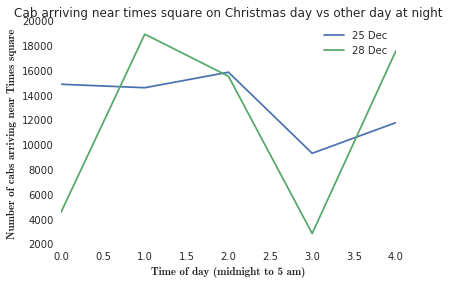

In [189]:
import seaborn as sns
import matplotlib.pyplot as plt
christmas, = plt.plot(counts[:5,3],label='25 Dec')
monday,=plt.plot(counts[:5,6],label='28 Dec')
plt.ylabel('Number of cabs arriving near Times square')
plt.xlabel('Time of day (midnight to 5 am)')
plt.title('Cab arriving near times square on Christmas day vs other day at night')
plt.legend(handles=[christmas,monday])

plt.show()
plt.savefig('number_cabs.png')
    

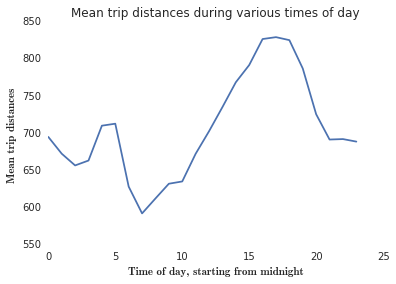

In [176]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.plot(grp3.trip_time_in_secs)
plt.ylabel('Mean trip distances ')
plt.xlabel('Time of day, starting from midnight')
plt.title('Mean trip distances during various times of day')
plt.show()
plt.savefig('trip_dist.png')    